<center> 
<h1> Proyecto de programación para análisis de datos </h1>
<h4> Rafael Takata García </h4>
<h5> Primavera 2024 </h5>
 </center>

### Primer avance

La escuela es una parte esencial de nuestra vida, es una etapa de formación en la que desarrollamos habilidades y conocimientos como en ninguna otra. Sin embargo, existen varios factores que pueden alterar nuestro desempeño en el salón de clases.

En el 2014, Paulo Cortez y Alice Silva se dedicarón a la recolección de la mayor cantidad de features de algunos alumnos en escuelas de nivel secundaria en el país de Portugal. Se estudiaron dos grupos, las personas que estudiaban portugués y las que estudiaban matemáticas. Para este proyecto, trabajaremos con el primero para intentar desarrollar un módelo de predicción para el segundo.

Este modelo puede ser importante porque nos habla de los factores que modifican el como se desenvuelven los alumnos en clase y el rendimiento de estos. En caso de funcionar, se pueden identificar áreas de oportunidad dentro del sistema educativo de la nación ademas de unos insights significativos sobre la juventud del país.

### Referencias

 
Cortez, Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

### Variables

**Las variables se distribuyen de la siguiente manera:** 
 - school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
 - sex - student's sex (binary: 'F' - female or 'M' - male)
 - age - student's age (numeric: from 15 to 22)
 - address - student's home address type (binary: 'U' - urban or 'R' - rural)
 - famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
 - Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
 - Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
 - Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
 - reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
 - guardian - student's guardian (nominal: 'mother', 'father' or 'other')
 - traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
 - studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
 - failures - number of past class failures (numeric: n if 1<=n<3, else 4)
 - schoolsup - extra educational support (binary: yes or no)
 - famsup - family educational support (binary: yes or no)
 - paid - extra paid classes within the course subject (binary: yes or no)
 - activities - extra-curricular activities (binary: yes or no)
 - nursery - attended nursery school (binary: yes or no)
 - higher - wants to take higher education (binary: yes or no)
 - internet - Internet access at home (binary: yes or no)
 - romantic - with a romantic relationship (binary: yes or no)
 - famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
 - freetime - free time after school (numeric: from 1 - very low to 5 - very high)
 - goout - going out with friends (numeric: from 1 - very low to 5 - very high)
 - Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
 - health - current health status (numeric: from 1 - very bad to 5 - very good)
 - absences - number of school absences (numeric: from 0 to 93)
 - These grades are related to the course subject for Portuguese:
 - G1 - first period grade (numeric: from 0 to 20)
 - G2 - second period grade (numeric: from 0 to 20)
 - G3 - final grade (numeric: from 0 to 20, output target)


### Librerías

In [113]:
import numpy as np #Se usara para el manejo de arrays
import pandas as pd #Manejo de los Dataframe
import seaborn as sns #Visualizaciones mucho más potentes
import matplotlib.pyplot as plt #Para el plotteo en las gráficas

### Creación e información general

In [114]:
#Creación del dataframe
porclass_df = pd.read_csv('../data/raw/student-por.csv')
porclass_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [115]:
#Tenemos 649 datos filas y 33 columnas con 0 datos vacíos.
porclass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [116]:
# Válores únicos
porclass_df.apply(lambda x: x.unique())

school                                                 [GP, MS]
sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 1, 2]
schoolsup                               

In [117]:
#Información general de las columnas
porclass_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### Visualización de los datos

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

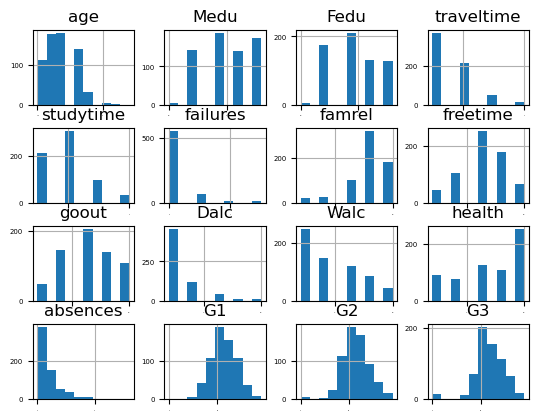

In [118]:
porclass_df.hist(ylabelsize=5, xlabelsize= 0, bins=10)

### Limpieza y procesamiento

Como vimos en la descripción de las variables, existen muchos datos nominales o de tipo booleano que realmente no podemos manejar al estar en texto por lo que es necesario el cambiarlos por número para poder generar las relaciones.

In [119]:
#Escuela a 1 y 0
porclass_df['school'] = porclass_df['school'].replace({'GP':1, 'MS':0})
porclass_df['school']

0      1
1      1
2      1
3      1
4      1
      ..
644    0
645    0
646    0
647    0
648    0
Name: school, Length: 649, dtype: int64

In [122]:
#Sexo a unos y ceros
porclass_df['sex'] = porclass_df['sex'].replace({'F':1, 'M':0})
porclass_df['sex']

0      1
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    1
647    0
648    0
Name: sex, Length: 649, dtype: int64

In [124]:
porclass_df['address'] = porclass_df['address'].replace({'U':1, 'R':0})
porclass_df['address']

0      1
1      1
2      1
3      1
4      1
      ..
644    0
645    1
646    1
647    1
648    0
Name: address, Length: 649, dtype: int64

In [126]:
porclass_df['famsize'] = porclass_df['famsize'].replace({'GT3': 1, 'LE3':0})
porclass_df['famsize']

0      1
1      1
2      0
3      1
4      1
      ..
644    1
645    0
646    1
647    0
648    0
Name: famsize, Length: 649, dtype: int64

In [128]:
porclass_df['Pstatus'] = porclass_df['Pstatus'].replace({'A': 1, 'T':0})
porclass_df['famsize']

0      1
1      1
2      0
3      1
4      1
      ..
644    1
645    0
646    1
647    0
648    0
Name: famsize, Length: 649, dtype: int64

In [130]:
#[at_home, health, other, services, teacher]
porclass_df['Mjob'] = porclass_df['Mjob'].replace({'at_home':-2, 'health': -1, 'other': 0, 'services':1, 'teacher':2})
porclass_df['Mjob']

0     -2
1     -2
2     -2
3     -1
4      0
      ..
644    1
645    2
646    0
647    1
648    1
Name: Mjob, Length: 649, dtype: int64

In [131]:
porclass_df['Fjob'] = porclass_df['Fjob'].replace({'at_home':-2, 'health': -1, 'other': 0, 'services':1, 'teacher':2})
porclass_df['Fjob']

0      2
1      0
2      0
3      1
4      0
      ..
644    0
645    1
646    0
647    1
648    0
Name: Fjob, Length: 649, dtype: int64

In [138]:
porclass_df['reason'] = porclass_df['reason'].replace({'home': -1, 'course': 0, 'other':1, 'reputation':2})
porclass_df['reason']

0      0
1      0
2      1
3     -1
4     -1
      ..
644    0
645    0
646    0
647    0
648    0
Name: reason, Length: 649, dtype: int64

In [ ]:
porclass_df['guardian'] = porclass_df['guardian'].replace({'home': -1, 'course': 0, 'other':1, 'reputation':2})
porclass_df['guardian']